**Problem Statement:**
The "iris" dataset is a well-known dataset in machine learning and statistics, which includes measurements of sepal length, sepal width, petal length, and petal width for 150 iris flowers, belonging to three different species: Iris setosa, Iris versicolor, and Iris virginica. Classifying the species of the flower given the sepal length, sepal width, petal length, and petal width.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
# Load the iris dataset
iris = load_iris()

In [ ]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
# Add a column with the target variable (species)
df['species'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**DATA DESCRIPTION**

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**The shape**

In [ ]:
df.shape

(150, 5)

**Details of the null values in the datset.**

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

**INFERENCE:** There are no null values in the dataset.

**EDA(Exploratory Data Analysis)**

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


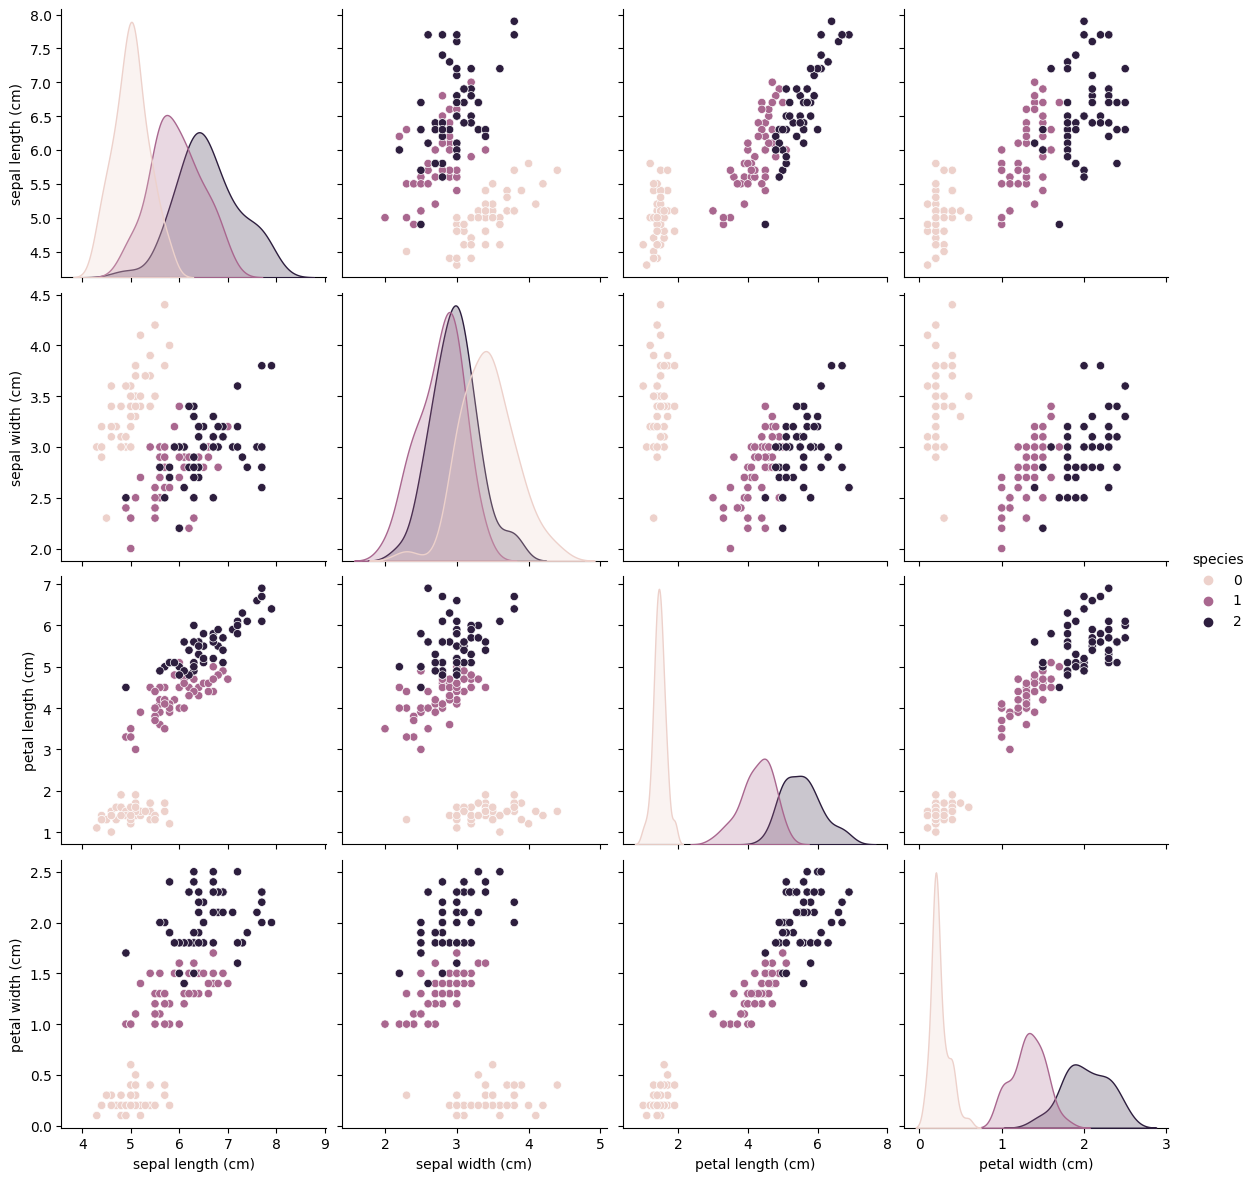

In [ ]:
# Bivariate Pairwise relationships between columns with seaborn library
sns.pairplot(df, hue="species", size=3, diag_kind="kde")

**SPLIT TRAIN AND TEST**

In [ ]:
 #Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Features before mean normalization
unscaled_features = X_train

**PREPROCESSING THE DATASET**

In [ ]:
# Mean Normalization to have a faster classifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#calculate μ & σ(fit) and apply the transformation(transform)
X_train_array = sc.fit_transform(X_train.values)

In [ ]:
 #Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

In [ ]:
# Center test data with the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)

In [ ]:
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

**Using Multilayer perceptron classifier**
MLPs are used for a wide range of machine learning tasks, such as classification, regression, and prediction. They are particularly useful for modeling complex non-linear relationships between input variables and output variables. MLPs are also highly flexible and can be used with various types of data, including numerical, categorical, and textual data.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10,), solver='sgd', learning_rate_init=0.01, max_iter=500)

**INFERENCE:**
MLP neural network model with one hidden layer of 10 neurons, uses stochastic gradient descent as the optimization algorithm with an initial learning rate of 0.01, and trains the model for a maximum of 500 iterations.

In [ ]:
# Train the model
mlp.fit(X_train, y_train)

# Outputs:
MLPClassifier (activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
beta_2=0.999, early_stopping=False, epsilon=1e-08,
hidden_layer_sizes=10, learning_rate='constant',
learning_rate_init=0.01, max_iter=500, momentum=0.9,
nesterovs_momentum=True, power_t=0.5, random_state=None,
shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
verbose=False, warm_start=False)

MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=500,
              solver='sgd')

In [ ]:
# Predictions for X_test are compared with y_test
print(mlp.score(X_test, y_test))

0.9666666666666667


**INFERENCE:**
An accuracy of 96% on the Iris dataset is a good indication that the MLPClassifier model is performing well on the classification task. The Iris dataset is a well-known dataset in machine learning, consisting of 150 instances of iris flowers, each with 4 features and a corresponding class label. The goal of the classification task is to predict the class label of a given iris flower based on its features.

An accuracy of 96% suggests that the MLPClassifier model is able to accurately classify the majority of the iris flowers in the dataset based on their features. This is a promising result, and it indicates that the MLPClassifier model is a good choice for this particular task.